<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/Least_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem:  Predict mpg (miles per gallon) from horsepower

In [2]:
# Download a real dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)

# Keep it simple: Predict mpg (miles per gallon) from horsepower
data = data[['horsepower', 'mpg']].dropna()

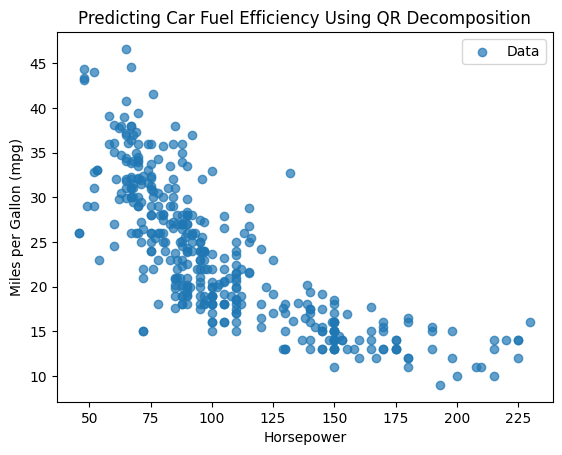

In [17]:
# Plot the data
plt.scatter(data['horsepower'], data['mpg'], label="Data", alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Predicting Car Fuel Efficiency Using QR Decomposition")
plt.legend()
plt.show()

In [3]:
X = data['horsepower'].values.reshape(-1, 1)
y = data['mpg'].values

# Add a bias (intercept) term manually
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

In [7]:
X_design.shape

(392, 2)

In [13]:
# QR decomposition
Q, R = np.linalg.qr(X_design)

# Solve R x = Q^T y
x_ls = np.linalg.solve(R, Q.T @ y)

print("Coefficients [intercept, slope]:", x_ls)

# Predicted values
y_pred = X_design @ x_ls

Coefficients [intercept, slope]: [39.93586102 -0.15784473]


In [14]:
R

array([[  -19.79898987, -2068.38835023],
       [    0.        ,  -761.11341642]])

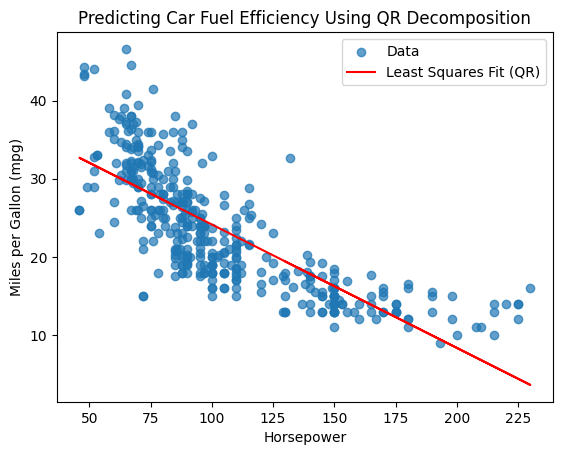

In [15]:
# Plot the data and the fitted line
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, y_pred, color='red', label="Least Squares Fit (QR)")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Predicting Car Fuel Efficiency Using QR Decomposition")
plt.legend()
plt.show()